## Project Description

This project focuses on building an image classification system using transfer learning. A pre-trained deep learning model is used as the base network to extract meaningful features from images, reducing training time and improving performance even with a limited dataset.

The workflow includes dataset extraction, image preprocessing, model building using a pre-trained architecture, training, and performance evaluation. Visual exploration of the dataset is performed to understand class distribution and sample patterns, followed by training and validation analysis using accuracy and loss curves.

Transfer learning enables efficient learning by leveraging previously learned representations, making this approach suitable for real-world image classification problems where labeled data may be limited.


Saving IT_Service_Desk_Incident_Dataset.csv to IT_Service_Desk_Incident_Dataset.csv


,Ticket_ID,Created_Date,Resolved_Date,Priority,Category,Sub_Category,Assigned_Team,Assigned_Engineer,Status,Resolution_Time_Hours,SLA_Target_Hours,SLA_Breached,Customer_Location,System_Affected
0,TKT10000,2024-04-12,2024-04-16 11:00:00,Low,Security,VPN Issue,IT Support D,Engineer_12,Resolved,107,96,Yes,India,Email Server
1,TKT10001,2024-12-14,2024-12-14 03:00:00,Low,Hardware,Login Issue,IT Support C,Engineer_19,Resolved,3,96,No,Canada,Network Gateway
2,TKT10002,2024-09-27,2024-09-28 09:00:00,Low,Security,VPN Issue,IT Support C,Engineer_7,Resolved,33,96,No,USA,CRM
3,TKT10003,2024-04-16,2024-04-16 06:00:00,High,Security,Login Issue,IT Support A,Engineer_10,Resolved,6,48,No,USA,Network Gateway
4,TKT10004,2024-03-12,2024-03-14 02:00:00,Medium,Security,Server Down,IT Support D,Engineer_16,Resolved,50,72,No,Canada,Database


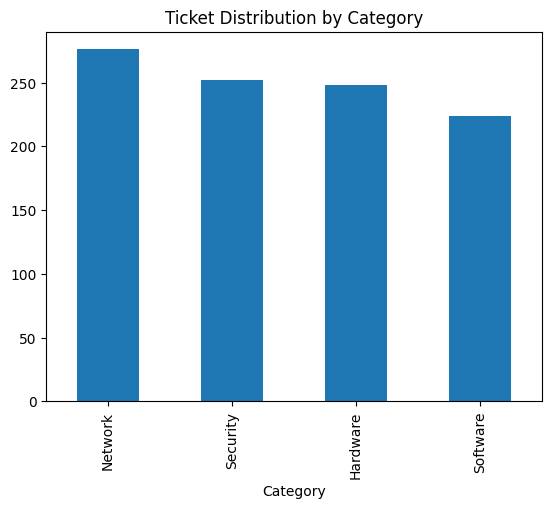

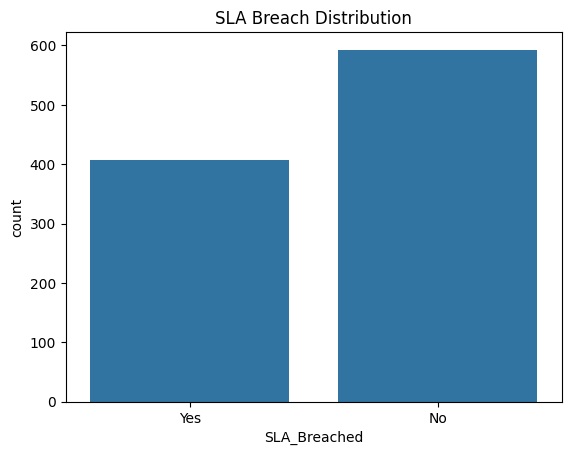

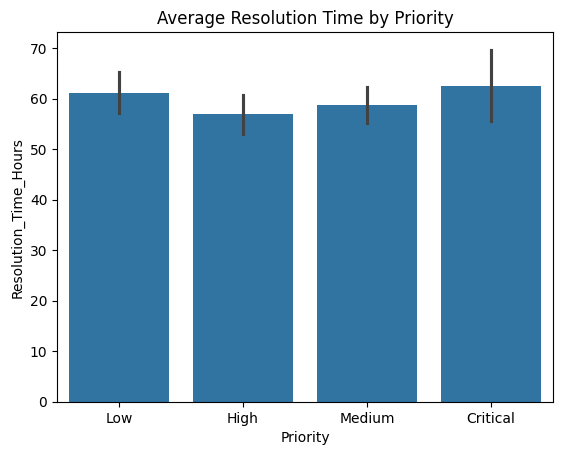

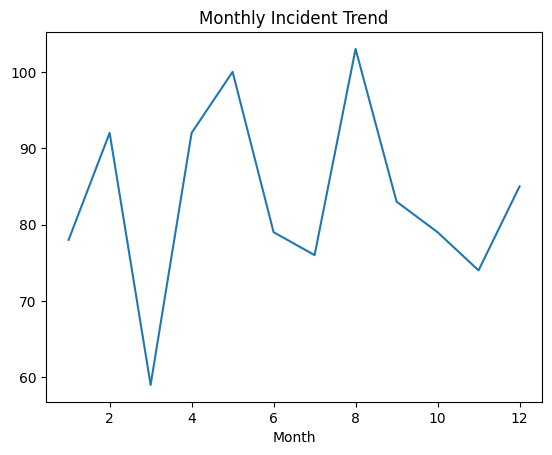

SLA Breach Rate (%)
SLA_Breached
No     59.3
Yes    40.7
Name: proportion, dtype: float64
Average Resolution Time (Hours): 59.28
Random Forest Accuracy: 0.99
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       118
           1       1.00      0.98      0.99        82

    accuracy                           0.99       200
   macro avg       0.99      0.99      0.99       200
weighted avg       0.99      0.99      0.99       200



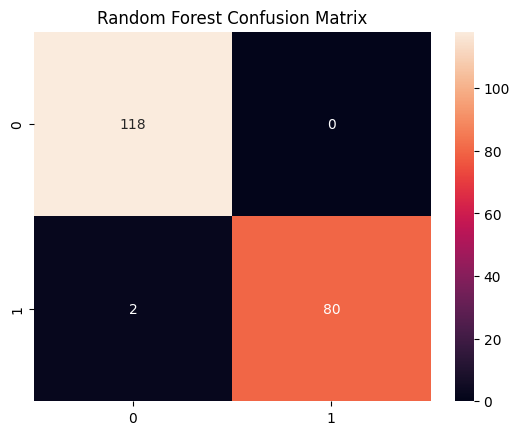

Epoch 1/20


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.4615 - loss: 0.7767 - val_accuracy: 0.6938 - val_loss: 0.6181
Epoch 2/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7296 - loss: 0.5787 - val_accuracy: 0.8500 - val_loss: 0.5088
Epoch 3/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7993 - loss: 0.5070 - val_accuracy: 0.8813 - val_loss: 0.4225
Epoch 4/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8520 - loss: 0.4236 - val_accuracy: 0.9187 - val_loss: 0.3449
Epoch 5/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8963 - loss: 0.3418 - val_accuracy: 0.9187 - val_loss: 0.2869
Epoch 6/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9339 - loss: 0.2759 - val_accuracy: 0.9187 - val_loss: 0.2414
Epoch 7/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9338 - loss: 0.2137 - val_accuracy: 0.9250 - val_loss: 0.2119
Epoch 8/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8938 - loss: 0.2313 - val_accuracy: 0.9250 - val_loss: 0.1926
E

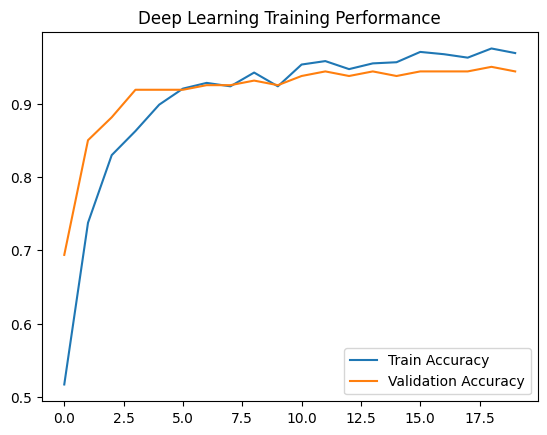

In [1]:
# STEP 1: Upload Dataset from Local System
from google.colab import files
uploaded = files.upload()


# STEP 2: Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout


# STEP 3: Load the Dataset
df = pd.read_csv("IT_Service_Desk_Incident_Dataset.csv")
display(df.head())


# STEP 4: Date Conversion and Feature Engineering
df['Created_Date'] = pd.to_datetime(df['Created_Date'])
df['Resolved_Date'] = pd.to_datetime(df['Resolved_Date'])

df['Resolution_Time_Hours'] = (
    df['Resolved_Date'] - df['Created_Date']
).dt.total_seconds() / 3600

df['Month'] = df['Created_Date'].dt.month
df['DayOfWeek'] = df['Created_Date'].dt.dayofweek


# STEP 5: Exploratory Data Analysis (EDA)
plt.figure()
df['Category'].value_counts().plot(kind='bar')
plt.title("Ticket Distribution by Category")
plt.show()

plt.figure()
sns.countplot(x='SLA_Breached', data=df)
plt.title("SLA Breach Distribution")
plt.show()

plt.figure()
sns.barplot(x='Priority', y='Resolution_Time_Hours', data=df)
plt.title("Average Resolution Time by Priority")
plt.show()

plt.figure()
df.groupby('Month')['Ticket_ID'].count().plot()
plt.title("Monthly Incident Trend")
plt.show()


# STEP 6: Business KPI Metrics
sla_breach_rate = df['SLA_Breached'].value_counts(normalize=True) * 100
avg_resolution_time = df['Resolution_Time_Hours'].mean()

print("SLA Breach Rate (%)")
print(sla_breach_rate)
print("Average Resolution Time (Hours):", round(avg_resolution_time, 2))


# STEP 7: Encode Categorical Variables
le = LabelEncoder()

categorical_cols = [
    'Priority', 'Category', 'Sub_Category',
    'Assigned_Team', 'Assigned_Engineer',
    'Customer_Location', 'System_Affected'
]

for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

df['SLA_Breached'] = df['SLA_Breached'].map({'No': 0, 'Yes': 1})


# STEP 8: Feature Selection
X = df[categorical_cols + [
    'Resolution_Time_Hours',
    'SLA_Target_Hours',
    'Month',
    'DayOfWeek'
]]

y = df['SLA_Breached']


# STEP 9: Train-Test Split and Feature Scaling
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# STEP 10: Machine Learning Model (Random Forest)
rf_model = RandomForestClassifier(
    n_estimators=200,
    class_weight='balanced',
    random_state=42
)

rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

plt.figure()
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.title("Random Forest Confusion Matrix")
plt.show()


# STEP 11: Deep Learning Model (Neural Network)
dl_model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

dl_model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

history = dl_model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)


# STEP 12: Deep Learning Model Evaluation
loss, acc = dl_model.evaluate(X_test, y_test)
print("Deep Learning Model Accuracy:", acc)

plt.figure()
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("Deep Learning Training Performance")
plt.legend()
plt.show()
